**Q1: Difference between Ordinal Encoding and Label Encoding:**

- **Label Encoding:**
  - Involves converting categorical labels into numeric form.
  - Assigns a unique integer to each category, often starting from 0 or 1.
  - The order or magnitude of the numeric values doesn't have a specific meaning.
  - It is suitable for nominal categorical data (categories with no inherent order).

- **Ordinal Encoding:**
  - Similar to Label Encoding, but considers the order or ranking of the categories.
  - Assigns integers based on the order or rank of the categories.
  - The numeric values have an ordinal relationship, meaning one value is greater than another.
  - Suitable for ordinal categorical data (categories with a meaningful order).

**Example:**
Consider a dataset with a "Size" feature having categories 'Small', 'Medium', and 'Large'.
- **Label Encoding:** Assigns 0, 1, 2 to these categories.
- **Ordinal Encoding:** Assigns 0, 1, 2 based on their order (e.g., 'Small' = 0, 'Medium' = 1, 'Large' = 2).

**When to Choose:**
- Use Label Encoding for nominal data where there is no inherent order.
- Use Ordinal Encoding when the categorical data has a meaningful order or ranking.

---

**Q2: Target Guided Ordinal Encoding:**

Target Guided Ordinal Encoding involves encoding categorical variables based on the mean of the target variable for each category. The steps include:

1. Calculate the mean of the target variable for each category.
2. Order the categories based on their mean values.
3. Assign ordinal integers to categories based on their order.

**Example:**
Consider a "City" feature and a binary target variable indicating whether a customer made a purchase. Order cities based on the mean purchase rate, then assign ordinal integers.

**Use Case:**
It can be useful when dealing with categorical features where the target variable shows a clear ordinal relationship with the categories. This method leverages information from the target variable to create ordinal encoding that might be more informative for certain machine learning algorithms.

---

**Q3: Covariance:**

Covariance measures the degree to which two variables change together. It indicates whether an increase in one variable corresponds to an increase or decrease in another. A positive covariance suggests a positive relationship, while a negative covariance suggests a negative relationship.

**Importance:**
- Helps understand the relationship between two variables.
- Used in portfolio theory in finance to manage risk.

**Calculation:**
For two variables X and Y with n data points:
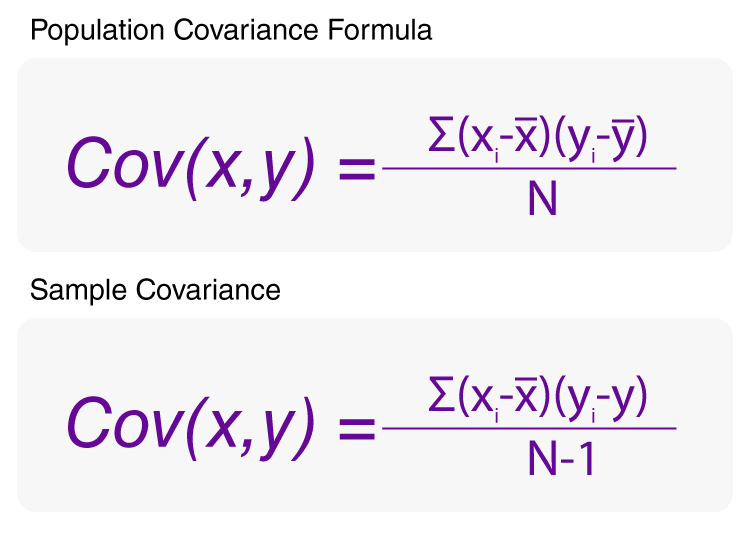


If Cov(X, Y) is:
- Positive: X and Y tend to increase or decrease together.
- Negative: X tends to increase when Y decreases or vice versa.
- Close to 0: Weak or no linear relationship.

Covariance's limitation is that its value depends on the scales of the variables, making interpretation challenging. To address this, correlation coefficient (normalized covariance) is often used.

In [1]:
#Q4
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame({'Color':['red', 'green', 'blue'], 'Size': ['small', 'medium','large'], 
                  'Material':['wood', 'metal', 'plastic']})

columns = ['Color', 'Size', 'Material']

lbl_encode = LabelEncoder()
df['color_encoded'] =  lbl_encode.fit_transform(df[['Color']])
df['Size_encoded'] =  lbl_encode.fit_transform(df[['Size']])
df['Material_encoded'] =  lbl_encode.fit_transform(df[['Material']])
    
print(df)


   Color    Size Material  color_encoded  Size_encoded  Material_encoded
0    red   small     wood              2             2                 2
1  green  medium    metal              1             1                 0
2   blue   large  plastic              0             0                 1


C:\Users\wwwsu\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wwwsu\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wwwsu\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In the output DataFrame, you can see that each unique category in the original categorical columns (Color, Size, Material) has been replaced with a corresponding integer in the new columns (Color_encoded, Size_encoded, Material_encoded). The mapping of the categories to integers is done by the fit_transform method of the LabelEncoder class. The encoded values are integers ranging from 0 to the number of unique categories minus 1 for each column.

In [2]:
#Q5
import pandas as pd

data  = {
    'Age':[23, 25, 28, 30, 45, 31, 30],
    'Income': [20000, 30000, 340000, 19000, 50000, 28000, 23000],
    'Education': ['B.sc', 'B.tech', 'M.sc', 'Highschool', 'M.tech', 'B.sc', 'B.sc' ]
}
df = pd.DataFrame(data)

education_order = {'Highschool': 0, 'B.sc': 1, "B.tech": 2, 'M.sc': 3, 'M.tech':4}
df['Education_encoded'] = df['Education'].map(education_order)

# Assuming you have a DataFrame 'df' with columns 'Age', 'Income', and 'Education'
covariance_matrix = df[['Age', 'Income', 'Education_encoded']].cov()

print(covariance_matrix)


                            Age        Income  Education_encoded
Age                   50.571429 -5.628571e+04           5.761905
Income            -56285.714286  1.398614e+10       79452.380952
Education_encoded      5.761905  7.945238e+04           1.904762


**Q6**

**1.Encoding Method: Binary encoding or one-hot encoding.**

Explanation:
Binary encoding can be used, where Male is encoded as 0 and Female as 1.
Alternatively, one-hot encoding can be applied, creating two binary columns (Male and Female) with 0 or 1 values

In [3]:
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({'Gender': ['Male', 'Female']})
print(df.head)
cols = ["Gender"]
encode = OneHotEncoder()

enCode = encode.fit_transform(df[cols]).toarray()
print(enCode)

encoded_df = pd.DataFrame(enCode, columns=encode.get_feature_names_out())
df_encoded = pd.concat([df, encoded_df], axis=1)
print(df_encoded)

<bound method NDFrame.head of    Gender
0    Male
1  Female>
[[0. 1.]
 [1. 0.]]
   Gender  Gender_Female  Gender_Male
0    Male            0.0          1.0
1  Female            1.0          0.0


**2.Education Level (Ordinal Variable):**

Encoding Method: Ordinal encoding.
Explanation:
Education level has an inherent order (e.g., High School < Bachelor's < Master's < PhD), making ordinal encoding suitable.

In [4]:
df = pd.DataFrame({'Education': ['Bachelor.s', 'PhD', 'Master.s', 'High School', 'Master.s', 'Bachelor.s', 'Bachelor.s' ]})

education_order = {'High School': 0, "Bachelor.s": 1, "Master.s": 2, 'PhD': 3}
df['Education_encoded'] = df['Education'].map(education_order)



print(df)


     Education  Education_encoded
0   Bachelor.s                  1
1          PhD                  3
2     Master.s                  2
3  High School                  0
4     Master.s                  2
5   Bachelor.s                  1
6   Bachelor.s                  1


**3.Employment Status (Nominal Variable):**

Encoding Method: One-hot encoding.
Explanation:
Employment status is a nominal variable without a clear order. One-hot encoding creates binary columns for each category, preserving the independence of categories.

In [5]:
df = pd.DataFrame({'Employment Status': ['Unemployed','Part-Time', 'Full-Time']})

df_nom = pd.get_dummies(df, columns=['Employment Status'], prefix='Employment')

print(df_nom)


   Employment_Full-Time  Employment_Part-Time  Employment_Unemployed
0                 False                 False                   True
1                 False                  True                  False
2                  True                 False                  False


In [6]:
#Q7

data = { 'Temperature': [50,45,40,35,30,25,20,15],
       'Humidity': [1.34,1.06,0.83,0.64,0.49,0.37,0.28,0.21],
       'Weather_Condition':['Sunny','Sunny','Sunny','Cloudy','Cloudy','Rainy','Rainy','Rainy'],
       'Wind_Direction':['East','West','South','East','North','South','West','North']}
df = pd.DataFrame(data)
print(df.head())

   Temperature  Humidity Weather_Condition Wind_Direction
0           50      1.34             Sunny           East
1           45      1.06             Sunny           West
2           40      0.83             Sunny          South
3           35      0.64            Cloudy           East
4           30      0.49            Cloudy          North


In [7]:
from sklearn.preprocessing import LabelEncoder

lbl_encoder = LabelEncoder()

df['Weather_Condition_encoded'] = lbl_encoder.fit_transform(df['Weather_Condition'])
df['Wind_Direction_encoded'] = lbl_encoder.fit_transform(df['Wind_Direction'])

print(df)

   Temperature  Humidity Weather_Condition Wind_Direction  \
0           50      1.34             Sunny           East   
1           45      1.06             Sunny           West   
2           40      0.83             Sunny          South   
3           35      0.64            Cloudy           East   
4           30      0.49            Cloudy          North   
5           25      0.37             Rainy          South   
6           20      0.28             Rainy           West   
7           15      0.21             Rainy          North   

   Weather_Condition_encoded  Wind_Direction_encoded  
0                          2                       0  
1                          2                       3  
2                          2                       2  
3                          0                       0  
4                          0                       1  
5                          1                       2  
6                          1                       3  
7         

In [8]:
cov_matrix = df[['Temperature', 'Humidity', 'Weather_Condition_encoded', 'Wind_Direction_encoded']].cov()
print(cov_matrix)

                           Temperature  Humidity  Weather_Condition_encoded  \
Temperature                 150.000000  4.764286                   5.357143   
Humidity                      4.764286  0.158736                   0.206786   
Weather_Condition_encoded     5.357143  0.206786                   0.696429   
Wind_Direction_encoded       -2.857143 -0.101429                   0.357143   

                           Wind_Direction_encoded  
Temperature                             -2.857143  
Humidity                                -0.101429  
Weather_Condition_encoded                0.357143  
Wind_Direction_encoded                   1.428571  
